### Before start running the code blocks, please upload the .csv file named

> 'anonymized_COVID-19_MS_dataset_041822.csv'

downloaded from AI Acad2022 Problem 1 Kaggle.
 This Jupyter Notebook developed by Tharathip Kulchotirat

# Import Neccessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Import Data

### Data Comprehension
getting data comprehension

In [ ]:
default_data = pd.read_csv('anonymized_COVID-19_MS_dataset_041822.csv')
default_data.head()

,Unnamed: 0,Sample_ID,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,1,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
default_data.shape

(4282, 2718)

There were 4282 rows of patients and 2715 columns of molecular mass. (from column index 3 and so on)

### Explore Data

Now, see if applicable data included.

In [ ]:
default_data['PCR_result'].value_counts()

unknown    1877
pos        1632
neg         773
Name: PCR_result, dtype: int64

There were 1877 unknown results from COVID-19 Saliva Testing, which will not be used for model training. So, I decided to drop all the rows with 'PCR_result' is 'unknown'.

In [ ]:
default_data.drop(default_data[default_data['PCR_result'] == 'unknown'].index, axis=0, inplace=True)
default_data['PCR_result'].value_counts()

pos    1632
neg     773
Name: PCR_result, dtype: int64

In [ ]:
default_data.shape

(2405, 2718)

Now, replace all 'NONE' value with 0, because the Spectra in Mass Spectrometry will shoot to > 0 if the chemicals/molecules/elements are detected. Also, I will use only the columns representing Spectra and the PCR result.

In [ ]:
df = default_data.iloc[:,2:]
df.fillna(0,inplace=True)
df

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.890322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3253,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3254,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3255,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, try to explore some individual PCR test

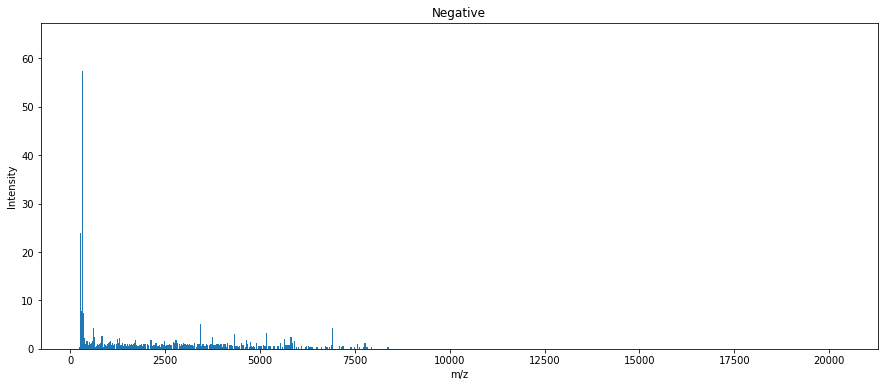

In [ ]:
mass_to_charge_names = list(float(f) for f in df.columns[1:])

#try plotting Mass Spectrometry of Negative Case
x = mass_to_charge_names
y = df.iloc[[df[df['PCR_result'] == 'neg'].index[54]], 1:].values[0]
plt.figure(figsize=(15,6))
plt.bar(x, y, width=30)
plt.ylim(0,max(y)+10)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.title('Negative')
plt.show()

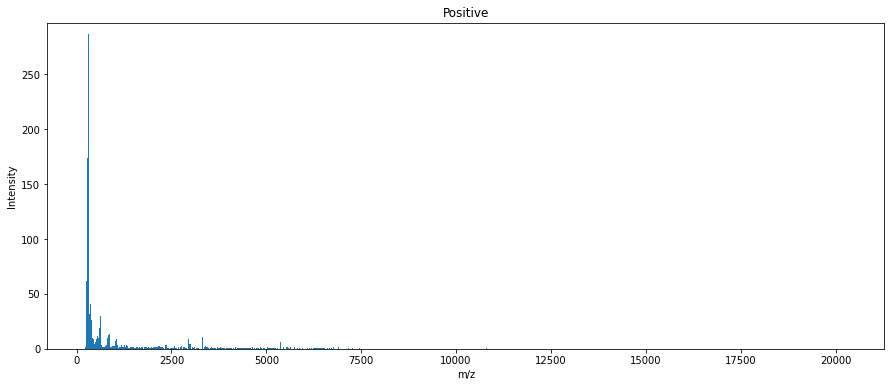

In [ ]:
#try plotting Mass Spectrometry of Positive Case
x = mass_to_charge_names
y = df.iloc[[df[df['PCR_result'] == 'pos'].index[54]], 1:].values[0]
plt.figure(figsize=(15,6))
plt.bar(x, y, width=30)
plt.ylim(0,max(y)+10)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.title('Positive')
plt.show()

By randomly selected from the dataset, I've found that, in Positive Case, there will be some values, around 200-300, shoot much higher than the negative case. (approximately 4 times)

Now, try to explore the data in other view using PCA. But, before I do that, I have done LabelEncoded the 'PCR_result' column. So I can use this processed data later.

In [ ]:
#One-hot encoding
le = LabelEncoder()
df['PCR_result'] = le.fit_transform(df['PCR_result'])
df

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.890322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3253,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3254,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3255,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separate Features from Target

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, [0]].values

In [ ]:
y = y.reshape((1,len(y)))[0]
y

array([1, 1, 1, ..., 0, 0, 0])

Then, use PCA to reduce data dimension to two.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pd.DataFrame(X_pca, index=None)

,0,1
0,-75.517316,105.006960
1,-90.942621,5.738250
2,-58.392977,65.878624
3,-78.387865,78.953792
4,-65.965307,57.276633
...,...,...
2400,14.397569,-58.001146
2401,29.324402,-50.941446
2402,-3.138195,-57.682515
2403,-49.668507,-65.590054


In [ ]:
df_plot = pd.concat([pd.DataFrame(X_pca), pd.DataFrame(y)], axis=1)
df_plot.columns = ['pca_1', 'pca_2', 'target']
df_plot

,pca_1,pca_2,target
0,-75.517316,105.006960,1
1,-90.942621,5.738250,1
2,-58.392977,65.878624,1
3,-78.387865,78.953792,1
4,-65.965307,57.276633,1
...,...,...,...
2400,14.397569,-58.001146,0
2401,29.324402,-50.941446,0
2402,-3.138195,-57.682515,0
2403,-49.668507,-65.590054,0


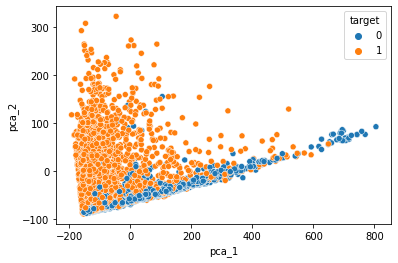

In [ ]:
sns.scatterplot(data=df_plot, x='pca_1', y='pca_2', hue='target')

From the chart, it has been suspected that "Linear Model" may provide better accuracy. However, I will run all models to compare each model before selection.

### Prepare data for training and validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(1683, 2715)

In [ ]:
X_test.shape

(722, 2715)

Now, standardize the data.

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Prepare Utilities

Prepare utilities, so complete model report will be easily executed.

In [ ]:
def cross_validate(model):
    accuracies = cross_val_score(estimator=model, X=X_train_sc, y=y_train, cv=10)
    for idx, f in enumerate(accuracies):
      print(f'Accuracy of fold {idx}', round(f, 3))
    print("Mean Accuracy of Cross Validation: {:.2f}%".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

def report_classification_metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return f1, precision, recall

def store_model_summary(model_name, accuracy, auc, f1, precision, recall):
    model_collection['Model'].append(model_name)
    model_collection['Accuracy'].append(accuracy)
    model_collection['F1 Score'].append(f1)
    model_collection['Precision'].append(precision)
    model_collection['Recall'].append(recall)
    model_collection['AUC'].append(auc)

model_collection = {'Model': [],'Accuracy': [],'F1 Score': [],'Precision': [],'Recall': [],'AUC': []}

def create_complete_report(model, model_name, X_test=X_test_sc, y_test=y_test):
    #print cross validation
    print('CROSS VALIDATION')
    print('-'*99)
    cross_validate(model)
    print('-'*99)
    print('')
    
    #classsification report
    y_pred = model.predict(X_test)
    print('CLASSIFICATION REPORT')
    print('-'*99)
    f1, precision, recall = report_classification_metrics(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('-'*99)
    print('')
    
    #plot Confusion Matrix and ROC
    
    #define metrics
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    #ROC curve
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))
    ax1.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
    ax1.set_title(f'ROC Curve of {model_name}')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')
    ax1.legend(loc=4)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax2 = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax2.set_title(f'Confusion Matrix of {model_name}')
    
    plt.show()
    
    #store model result
    print('')
    print('-'*99)
    print('MODEL RESULT SUMMARY')
    if model_name not in model_collection['Model']:
        store_model_summary(model_name, accuracy, auc, f1, precision, recall)
    display(pd.DataFrame(model_collection))

Import Model Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# Model Development and Selection

## Logistic Regression

In [ ]:
#declare model
lr = LogisticRegression(random_state=0)

#training
lr.fit(X_train_sc, y_train)

#predict
y_pred = lr.predict(X_test_sc)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', round(accuracy*100,3),'%')

Accuracy:  91.967 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.941
Accuracy of fold 1 0.941
Accuracy of fold 2 0.947
Accuracy of fold 3 0.899
Accuracy of fold 4 0.929
Accuracy of fold 5 0.923
Accuracy of fold 6 0.911
Accuracy of fold 7 0.917
Accuracy of fold 8 0.899
Accuracy of fold 9 0.917
Mean Accuracy of Cross Validation: 92.21%
Standard Deviation: 1.62%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       237
           1       0.92      0.96      0.94       485

    accuracy                           0.92       722
   macro avg       0.92      0.90      0.91       722
weighted avg       0.92      0.92      0.92       722

---------------

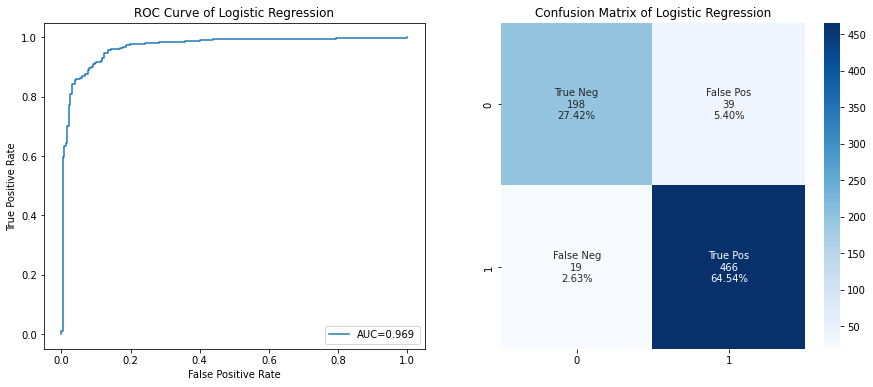


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811


In [ ]:
create_complete_report(lr, 'Logistic Regression')

## KNN

First, test for K selection

In [ ]:
for n in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=2)
    knn.fit(X_train_sc, y_train)
    y_pred = knn.predict(X_test_sc)
    cm_knn = confusion_matrix(y_test, y_pred)
    print('KNN for n = ', n)
    print(cm_knn)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

KNN for n =  2
[[174  63]
 [244 241]]
Accuracy:  0.574792243767313

KNN for n =  3
[[101 136]
 [ 59 426]]
Accuracy:  0.7299168975069252

KNN for n =  4
[[134 103]
 [113 372]]
Accuracy:  0.7008310249307479

KNN for n =  5
[[ 84 153]
 [ 30 455]]
Accuracy:  0.7465373961218836

KNN for n =  6
[[109 128]
 [ 51 434]]
Accuracy:  0.7520775623268698

KNN for n =  7
[[ 76 161]
 [ 14 471]]
Accuracy:  0.7576177285318559

KNN for n =  8
[[ 89 148]
 [ 26 459]]
Accuracy:  0.7590027700831025

KNN for n =  9
[[ 64 173]
 [  5 480]]
Accuracy:  0.7534626038781164



K that gives the best accuracy is 8. So...

In [ ]:
#define final Model
knn = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100, 3),'%')

Accuracy:  75.9 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.74
Accuracy of fold 1 0.775
Accuracy of fold 2 0.734
Accuracy of fold 3 0.78
Accuracy of fold 4 0.78
Accuracy of fold 5 0.75
Accuracy of fold 6 0.762
Accuracy of fold 7 0.732
Accuracy of fold 8 0.744
Accuracy of fold 9 0.774
Mean Accuracy of Cross Validation: 75.70%
Standard Deviation: 1.83%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.38      0.51       237
           1       0.76      0.95      0.84       485

    accuracy                           0.76       722
   macro avg       0.77      0.66      0.67       722
weighted avg       0.76      0.76      0.73       722

-------------------

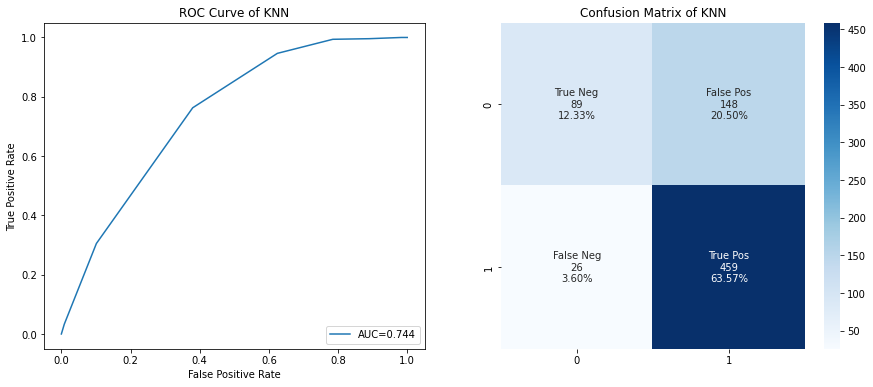


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699


In [ ]:
create_complete_report(knn, 'KNN')

## SVM

Start with choosing the right Kernel.

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernel:
    svm = SVC(kernel = k, random_state = 1)
    svm.fit(X_train_sc, y_train)
    y_pred = svm.predict(X_test_sc)
    cm_svm = confusion_matrix(y_test, y_pred)
    print('svm for kernel = ', k)
    print(cm_svm)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

svm for kernel =  linear
[[193  44]
 [ 28 457]]
Accuracy:  0.9002770083102493

svm for kernel =  poly
[[ 17 220]
 [  6 479]]
Accuracy:  0.6869806094182825

svm for kernel =  rbf
[[139  98]
 [  5 480]]
Accuracy:  0.8573407202216067

svm for kernel =  sigmoid
[[181  56]
 [ 18 467]]
Accuracy:  0.8975069252077562



The kernel that gives us best accuracy is 'linear'.

In [ ]:
#define Final Model for SVM
svm = SVC(kernel = 'linear', random_state = 1, probability=True)
svm.fit(X_train_sc, y_train)
y_pred = svm.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')
print('')

Accuracy:  90.028 %



CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.923
Accuracy of fold 1 0.917
Accuracy of fold 2 0.959
Accuracy of fold 3 0.905
Accuracy of fold 4 0.935
Accuracy of fold 5 0.911
Accuracy of fold 6 0.905
Accuracy of fold 7 0.905
Accuracy of fold 8 0.905
Accuracy of fold 9 0.929
Mean Accuracy of Cross Validation: 91.92%
Standard Deviation: 1.67%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       237
           1       0.91      0.94      0.93       485

    accuracy                           0.90       722
   macro avg       0.89      0.88      0.88       722
weighted avg       0.90      0.90      0.90       722

---------------

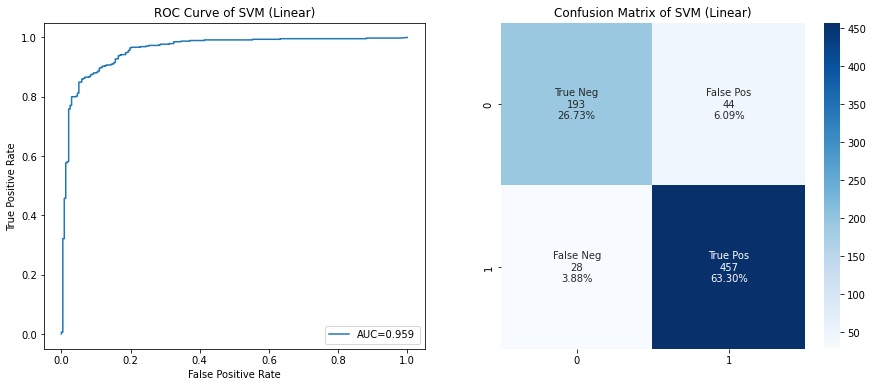


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976


In [ ]:
create_complete_report(svm, "SVM (Linear)")

## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train_sc, y_train)
y_pred = nb.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  59.972 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.633
Accuracy of fold 1 0.574
Accuracy of fold 2 0.586
Accuracy of fold 3 0.595
Accuracy of fold 4 0.685
Accuracy of fold 5 0.589
Accuracy of fold 6 0.607
Accuracy of fold 7 0.595
Accuracy of fold 8 0.643
Accuracy of fold 9 0.542
Mean Accuracy of Cross Validation: 60.49%
Standard Deviation: 3.79%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.76      0.55       237
           1       0.81      0.52      0.64       485

    accuracy                           0.60       722
   macro avg       0.63      0.64      0.60       722
weighted avg       0.69      0.60      0.61       722

---------------

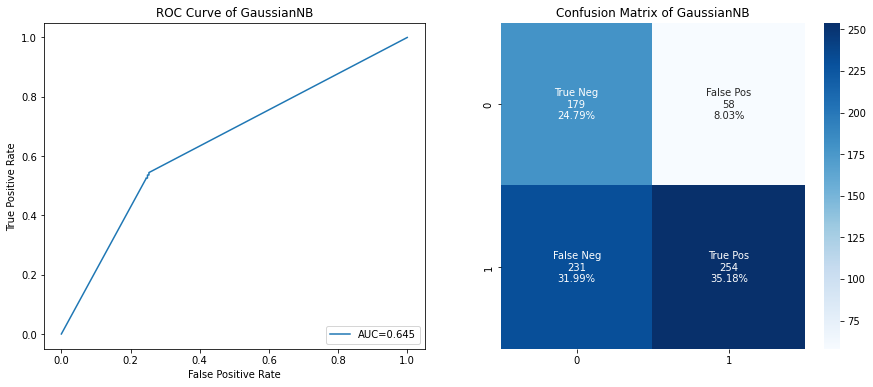


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243


In [ ]:
create_complete_report(nb, "GaussianNB")

## Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train_sc, y_train)
y_pred = tree.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  89.197 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.893
Accuracy of fold 1 0.905
Accuracy of fold 2 0.923
Accuracy of fold 3 0.905
Accuracy of fold 4 0.887
Accuracy of fold 5 0.917
Accuracy of fold 6 0.911
Accuracy of fold 7 0.929
Accuracy of fold 8 0.893
Accuracy of fold 9 0.946
Mean Accuracy of Cross Validation: 91.09%
Standard Deviation: 1.74%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       237
           1       0.93      0.90      0.92       485

    accuracy                           0.89       722
   macro avg       0.87      0.89      0.88       722
weighted avg       0.89      0.89      0.89       722

---------------

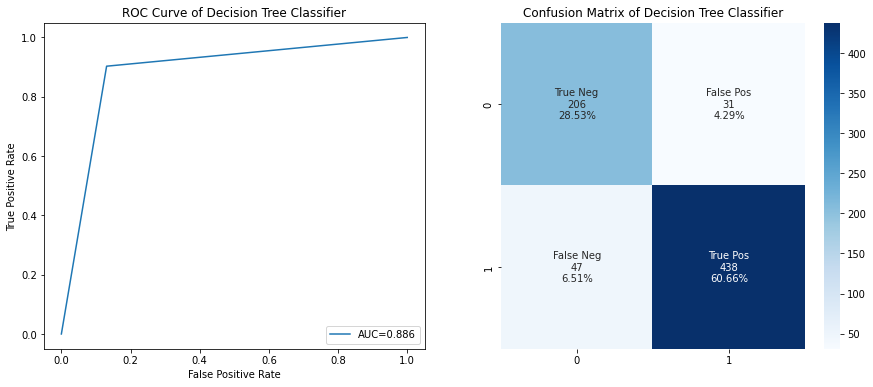


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243
4,Decision Tree Classifier,0.891967,0.918239,0.933902,0.903093,0.886146


In [ ]:
create_complete_report(tree, "Decision Tree Classifier")

## Random Forest Classifier

First, test the best number of forest depth

In [ ]:
#test for number of trees depth
for t in range(2,15):
    forest = RandomForestClassifier(n_estimators = t, criterion = 'entropy', random_state = 0)
    forest.fit(X_train_sc, y_train)
    y_pred = forest.predict(X_test_sc)
    cm_forest = confusion_matrix(y_test, y_pred)
    print('forest depth = ', t)
    print(cm_forest)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

forest depth =  2
[[221  16]
 [ 91 394]]
Accuracy:  0.8518005540166205

forest depth =  3
[[193  44]
 [ 36 449]]
Accuracy:  0.889196675900277

forest depth =  4
[[218  19]
 [ 54 431]]
Accuracy:  0.8988919667590027

forest depth =  5
[[203  34]
 [ 27 458]]
Accuracy:  0.9155124653739612

forest depth =  6
[[217  20]
 [ 42 443]]
Accuracy:  0.9141274238227147

forest depth =  7
[[203  34]
 [ 25 460]]
Accuracy:  0.9182825484764543

forest depth =  8
[[217  20]
 [ 34 451]]
Accuracy:  0.925207756232687

forest depth =  9
[[206  31]
 [ 19 466]]
Accuracy:  0.9307479224376731

forest depth =  10
[[211  26]
 [ 32 453]]
Accuracy:  0.9196675900277008

forest depth =  11
[[204  33]
 [ 21 464]]
Accuracy:  0.925207756232687

forest depth =  12
[[210  27]
 [ 29 456]]
Accuracy:  0.9224376731301939

forest depth =  13
[[204  33]
 [ 23 462]]
Accuracy:  0.9224376731301939

forest depth =  14
[[212  25]
 [ 27 458]]
Accuracy:  0.9279778393351801



Depth 9 gives the best accuracy, so...

In [ ]:
forest = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
forest.fit(X_train_sc, y_train)
y_pred = forest.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('forest depth = ', 9)
print('Accuracy: ',round(accuracy*100,3),'%')

forest depth =  9
Accuracy:  93.075 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.953
Accuracy of fold 1 0.947
Accuracy of fold 2 0.893
Accuracy of fold 3 0.869
Accuracy of fold 4 0.917
Accuracy of fold 5 0.899
Accuracy of fold 6 0.923
Accuracy of fold 7 0.857
Accuracy of fold 8 0.935
Accuracy of fold 9 0.935
Mean Accuracy of Cross Validation: 91.26%
Standard Deviation: 3.06%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       237
           1       0.94      0.96      0.95       485

    accuracy                           0.93       722
   macro avg       0.93      0.92      0.92       722
weighted avg       0.93      0.93      0.93       722

---------------

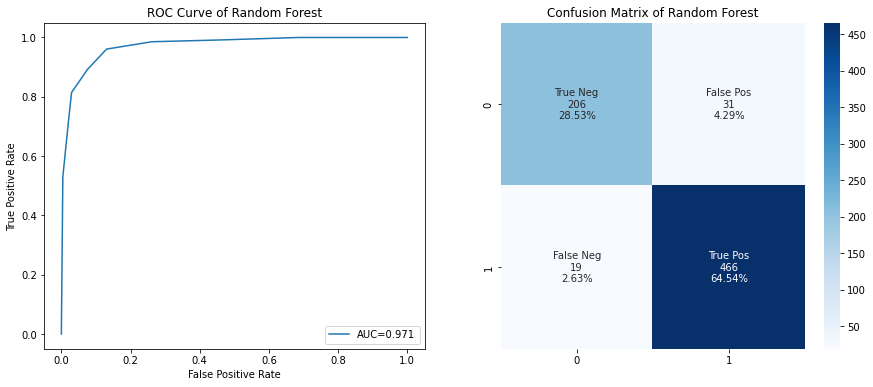


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243
4,Decision Tree Classifier,0.891967,0.918239,0.933902,0.903093,0.886146
5,Random Forest,0.930748,0.949084,0.937626,0.960825,0.971117


In [ ]:
create_complete_report(forest, "Random Forest")

## XGBoost Classifier

In [ ]:
xg = XGBClassifier()
xg.fit(X_train_sc, y_train)
y_pred = xg.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  96.26 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.976
Accuracy of fold 1 0.97
Accuracy of fold 2 0.959
Accuracy of fold 3 0.964
Accuracy of fold 4 0.976
Accuracy of fold 5 0.935
Accuracy of fold 6 0.97
Accuracy of fold 7 0.976
Accuracy of fold 8 0.952
Accuracy of fold 9 0.964
Mean Accuracy of Cross Validation: 96.43%
Standard Deviation: 1.25%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       237
           1       0.97      0.97      0.97       485

    accuracy                           0.96       722
   macro avg       0.96      0.96      0.96       722
weighted avg       0.96      0.96      0.96       722

-----------------

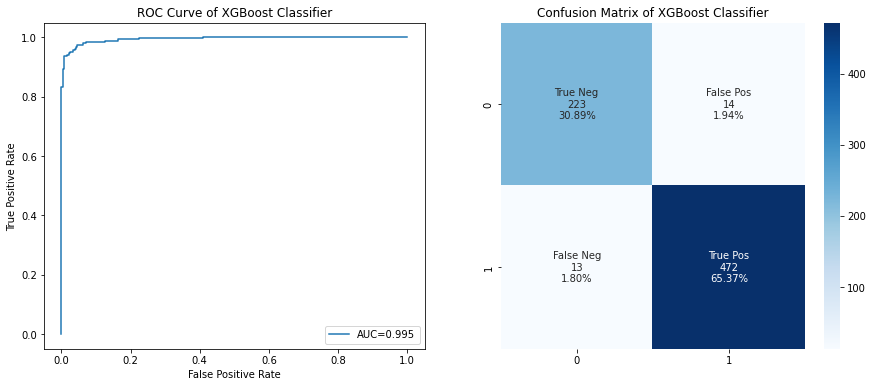


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243
4,Decision Tree Classifier,0.891967,0.918239,0.933902,0.903093,0.886146
5,Random Forest,0.930748,0.949084,0.937626,0.960825,0.971117
6,XGBoost Classifier,0.962604,0.972194,0.971193,0.973196,0.994502


In [ ]:
create_complete_report(xg, "XGBoost Classifier")

## Visualize Models Metrics

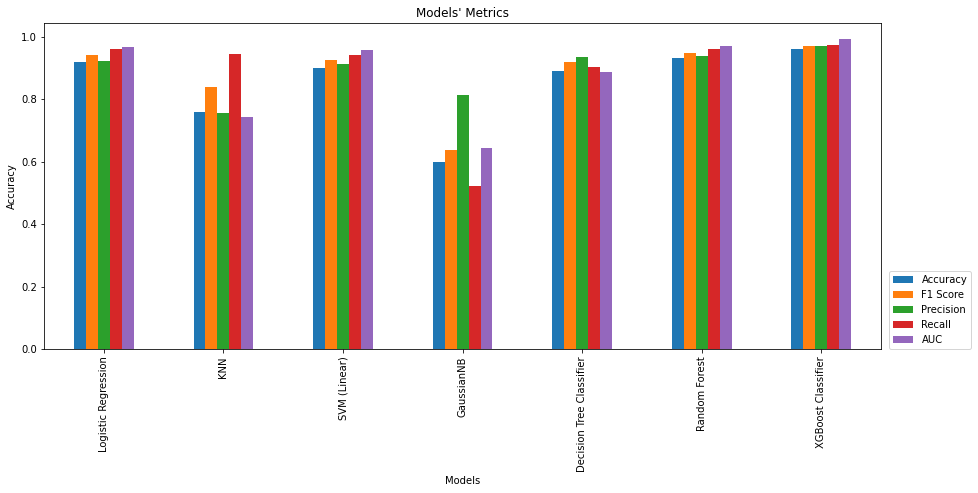

In [ ]:
pd.DataFrame(model_collection).plot(x="Model", y=["Accuracy", "F1 Score", 'Precision','Recall','AUC'], kind="bar", figsize=(15, 6))
plt.title("Models' Metrics")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc=(1.01,0))

In [ ]:
pd.DataFrame(model_collection)

,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243
4,Decision Tree Classifier,0.891967,0.918239,0.933902,0.903093,0.886146
5,Random Forest,0.930748,0.949084,0.937626,0.960825,0.971117
6,XGBoost Classifier,0.962604,0.972194,0.971193,0.973196,0.994502


> Best Performance belongs to XGBoost.










# Save Model

In [ ]:
import joblib
joblib.dump(xg, 'xgboost classifier for COVID-19 Tesing.pkl')

['xgboost classifier for COVID-19 Tesing.pkl']

# Test Model

In [ ]:
loaded_model = joblib.load('xgboost classifier for COVID-19 Tesing.pkl')

In [ ]:
loaded_model.predict(X_test_sc)[:6]

array([0, 1, 1, 1, 1, 1])

In [ ]:
individual_neg = df.iloc[[df[df['PCR_result'] == 0].index[54]], 1:].values
result = loaded_model.predict(sc.transform(individual_neg))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 undetectable
Confidence Rate: 95.053 %


In [ ]:
individual_pos = df.iloc[[df[df['PCR_result'] == 1].index[54]], 1:].values
result = loaded_model.predict(sc.transform(individual_pos))
prob = loaded_model.predict_proba(sc.transform(individual_pos))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 detectable
Confidence Rate: 85.042 %


In [ ]:
individual_pos = df.iloc[[df[df['PCR_result'] == 1].index[75]], 1:].values
result = loaded_model.predict(sc.transform(individual_pos))
prob = loaded_model.predict_proba(sc.transform(individual_pos))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 detectable
Confidence Rate: 95.816 %


In [ ]:
individual_neg = df.iloc[[df[df['PCR_result'] == 0].index[75]], 1:].values
result = loaded_model.predict(sc.transform(individual_neg))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 undetectable
Confidence Rate: 98.841 %


# Identify Protein (Features) Importance

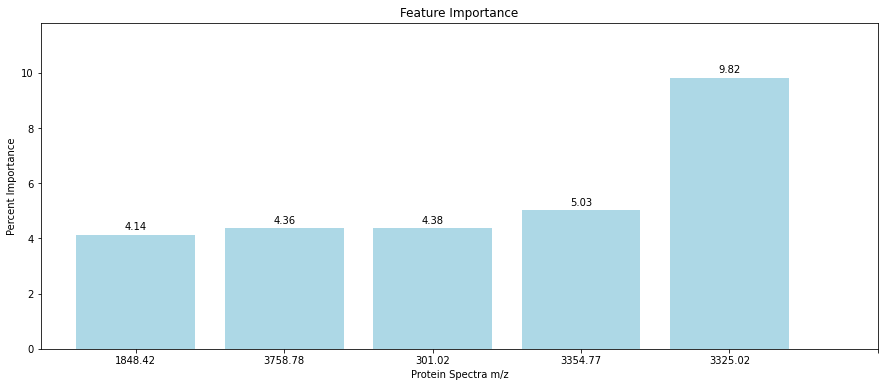

In [ ]:
sorted_idx = loaded_model.feature_importances_.argsort()

plt.figure(figsize=(15,6))
plots = plt.bar(range(len(loaded_model.feature_importances_[sorted_idx][-5:])), loaded_model.feature_importances_[sorted_idx][-5:] * 100, color = 'lightblue')
plt.title('Feature Importance')
plt.xticks([0,1,2,3,4,5], np.array(mass_to_charge_names)[sorted_idx][-5:])
plt.ylabel('Percent Importance')
plt.xlabel('Protein Spectra m/z')
plt.ylim(0,max(loaded_model.feature_importances_[sorted_idx][-5:] * 100)+2)
for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

The result showed 5 most influential molecules represented in molecular mass as in the chart.

The molecules have the following molecular mass:

> 1. 3325.02 g/mol
> 2. 3354.77 g/mol
> 3. 301.02 g/mol
> 4. 3758.78 g/mol
> 5. 1848.42 g/mol








# [*Challenge*] Unlabeled Data Points

Get back the default dataset

In [ ]:
default_data = pd.read_csv('anonymized_COVID-19_MS_dataset_041822.csv')
unlabeled_df = default_data[default_data['PCR_result'] == 'unknown'].iloc[:, 2:]
unlabeled_df

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
209,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,unknown,NaN,NaN,NaN,NaN,NaN,0.914284,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4278,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4279,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4280,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
unlabeled_df['PCR_result'].value_counts()

unknown    1877
Name: PCR_result, dtype: int64

Manipulation on unlabeled data

In [ ]:
unlabeled_df.fillna(0, axis=0, inplace=True)
unlabeled_df['PCR_result'] = 0 #Set to 0 before being replaced by the result from prediction
unlabeled_df

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
209,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0,0.0,0.0,0.0,0.0,0.0,0.914284,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4278,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4279,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Extract only Features Vectors

In [ ]:
unlabeled_X = unlabeled_df.iloc[:, 1:].values
unlabeled_X.shape

(1877, 2715)

Data Standardization

In [ ]:
unlabeled_X = sc.transform(unlabeled_X)
unlabeled_X[:, :2]

array([[-0.03268146, -0.04431945],
       [-0.03268146, -0.04431945],
       [-0.03268146, -0.04431945],
       ...,
       [-0.03268146, -0.04431945],
       [-0.03268146, -0.04431945],
       [-0.03268146, -0.04431945]])

Getting Prediction from the model and labeling the data points

In [ ]:
unlabeled_ypred = loaded_model.predict(unlabeled_X)
unlabeled_df['PCR_result'] = unlabeled_ypred
unlabeled_df['PCR_result'].value_counts()

1    1367
0     510
Name: PCR_result, dtype: int64

Recheck the originally labeled data point

In [ ]:
df['PCR_result'].value_counts()

1    1632
0     773
Name: PCR_result, dtype: int64

Concatenate 2 Dataframes. Then, the dataset size is equal to the default dataset.

In [ ]:
df_concat = pd.concat([df, unlabeled_df], axis=0)
df_concat['PCR_result'].value_counts()

1    2999
0    1283
Name: PCR_result, dtype: int64

Re-train model

In [ ]:
concat_X = df_concat.iloc[:, 1:].values
concat_y = df_concat.iloc[:, 0].values
print(concat_X.shape)
print(concat_y.shape)

(4282, 2715)
(4282,)


In [ ]:
concat_X_train, concat_X_test, concat_y_train, concat_y_test = train_test_split(concat_X, concat_y, test_size=0.3, random_state=0)
print(concat_X_train.shape)
print(concat_X_test.shape)
print(concat_y_train.shape)
print(concat_y_test.shape)

(2997, 2715)
(1285, 2715)
(2997,)
(1285,)


In [ ]:
xg = XGBClassifier()
xg.fit(concat_X_train, concat_y_train)
y_pred = xg.predict(concat_X_test)
accuracy = (accuracy_score(concat_y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  95.097 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.976
Accuracy of fold 1 0.97
Accuracy of fold 2 0.959
Accuracy of fold 3 0.964
Accuracy of fold 4 0.976
Accuracy of fold 5 0.935
Accuracy of fold 6 0.97
Accuracy of fold 7 0.976
Accuracy of fold 8 0.952
Accuracy of fold 9 0.964
Mean Accuracy of Cross Validation: 96.43%
Standard Deviation: 1.25%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       371
           1       0.96      0.97      0.97       914

    accuracy                           0.95      1285
   macro avg       0.94      0.94      0.94      1285
weighted avg       0.95      0.95      0.95      1285

-----------------

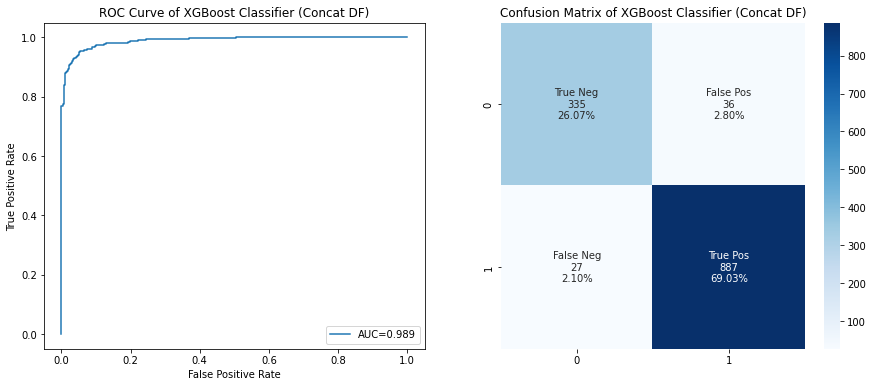


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,0.919668,0.941414,0.922772,0.960825,0.968811
1,KNN,0.759003,0.840659,0.756178,0.946392,0.743699
2,SVM (Linear),0.900277,0.926978,0.912176,0.942268,0.958976
3,GaussianNB,0.599723,0.637390,0.814103,0.523711,0.645243
4,Decision Tree Classifier,0.891967,0.918239,0.933902,0.903093,0.886146
5,Random Forest,0.930748,0.949084,0.937626,0.960825,0.971117
6,XGBoost Classifier,0.962604,0.972194,0.971193,0.973196,0.994502
7,XGBoost Classifier (Concat DF),0.950973,0.965705,0.960997,0.970460,0.988985


In [ ]:
create_complete_report(xg, "XGBoost Classifier (Concat DF)",concat_X_test, concat_y_test)

In [ ]:
individual_neg = df_concat.iloc[[df_concat[df_concat['PCR_result'] == 0].index[75]], 1:].values
result = xg.predict(sc.transform(individual_neg))
prob = xg.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 undetectable
Confidence Rate: 97.336 %


In [ ]:
individual_pos = df_concat.iloc[[df_concat[df_concat['PCR_result'] == 1].index[75]], 1:].values
result = xg.predict(sc.transform(individual_pos))
prob = xg.predict_proba(sc.transform(individual_pos))
if result[0] == 0:
  print("COVID-19 undetectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("COVID-19 detectable")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

COVID-19 detectable
Confidence Rate: 98.102 %


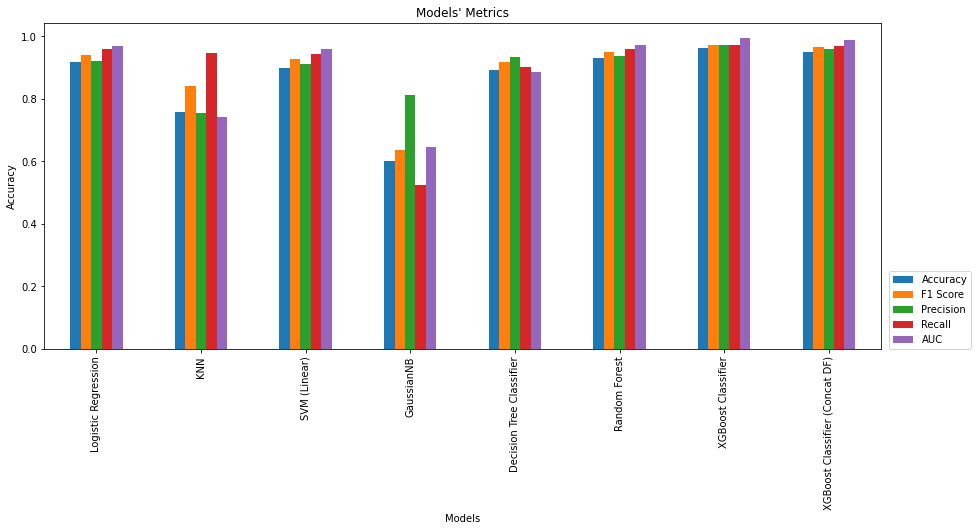

In [ ]:
pd.DataFrame(model_collection).plot(x="Model", y=["Accuracy", "F1 Score", 'Precision','Recall','AUC'], kind="bar", figsize=(15, 6))
plt.title("Models' Metrics")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc=(1.01,0))